In [7]:
import pandas as pd
import sqlite3

In [8]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

In [9]:
df = pd.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", con, parse_dates=['timestamp'])
df.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [14]:
df['daytime'] = pd.cut(df['timestamp'].dt.hour,
                         bins=[-1, 4, 10, 17, 24],
                         labels=['night', 'morning', 'afternoon', 'evening'])
df

,timestamp,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [39]:
commit_count = df.groupby(by=[df['timestamp'].dt.date, df['daytime']], observed=False).count()
commit_count = commit_count.rename(columns={'timestamp': 'count'})
commit_count = commit_count.unstack().droplevel(0, axis='columns')
commit_count.head()

daytime,night,morning,afternoon,evening
timestamp,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16


<Axes: title={'center': 'Commits per day'}, xlabel='timestamp'>

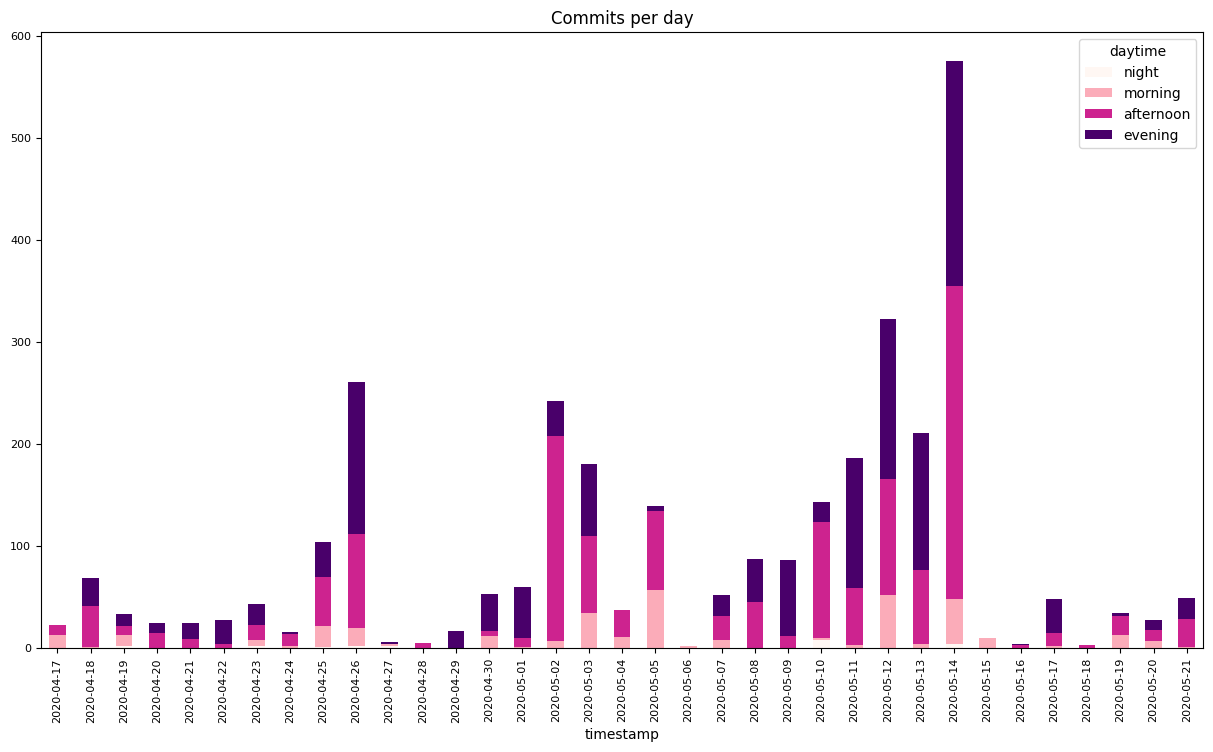

In [37]:
plt = commit_count.plot.bar(figsize=(15,8),
                        fontsize= 8,
                        title='Commits per day',
                        rot=90,
                        stacked=True,
                        colormap='RdPu',
                        alpha=1)

plt

In [40]:
con.close()

## When do our users usually commit the labs: in the night, morning, afternoon, or evening?
- afternoon and evening

## Which day has:
- the most number of commits: 
- and at the same time, the number of commits in the evening is higher than in the afternoon?

- 2020-05-12